## **Assignment 3: Implementation of TrustRank algorithm.**

<font size='4'>**Submitted by:**</br>
1. Anilava Kundu **CS20MTECH01002**
2. Kuldeep Gautam **CS20MTECH01004**
3. Vishal Singh Yadav **CS20MTECH01001**

In [4]:
import numpy as np
import operator
import networkx as nx
import matplotlib.pyplot as plt
import pylab

In [5]:
trusted_pages_ratio = 0.4
trusted_pages = []
maxer = 0
nodes_dict = {}
nodes = []
count = 0
beta = 0.85

In [6]:
with open("graph.txt", "r") as data_file:
    count = 0
    for line in data_file:
        if count>100:
            continue
        count+=1
        line_values = line.split(" ")
        a = int(line_values[0])
        b = int(line_values[1])
        if a > maxer:
            maxer = a
        if b > maxer:
            maxer = b
        if a not in nodes:
            nodes.append(a)
        if b not in nodes:
            nodes.append(b)
        if a not in nodes_dict:
            nodes_dict[a] = [b]
        else:
            nodes_dict[a].append(b)

In [7]:
M = np.zeros((maxer + 1, maxer + 1))
v = np.zeros(maxer + 1)

In [8]:
for from_node in nodes_dict:
    length = len(nodes_dict[from_node])
    fraction = 1 / length
    for to_node in nodes_dict[from_node]:
        M[to_node][from_node] = fraction


In [9]:
no_of_nodes = len(nodes)
fraction = 1 / no_of_nodes
for i in range(1, maxer + 1):
    if i in nodes:
        v[i] = fraction

In [10]:
teleport = (1 - beta) * v

M = beta * M

In [11]:
while 1:
    v1 = np.dot(M, v) + teleport
    if np.array_equal(v1, v):
        break
    else:
        v = v1
        count += 1

In [12]:
page_rank_score = []
for i in range(1, len(v)):
    if v[i] != 0:
        page_rank_score.append([i, v[i]])

In [13]:
sorted_page_rank_score = sorted(
    page_rank_score, key=operator.itemgetter(1), reverse=True
)

In [15]:
no_of_trusted_pages = int(trusted_pages_ratio * len(sorted_page_rank_score))

In [16]:
trusted_pages = [
    page_info[0]
    for i, page_info in zip(range(0, no_of_trusted_pages), sorted_page_rank_score)
]

In [17]:
fraction = 1 / no_of_trusted_pages

In [18]:
v = np.zeros(maxer + 1)
for i in range(1, maxer + 1):
    if i in trusted_pages:
        v[i] = fraction

In [19]:
teleport = (1 - beta) * v
count = 0

In [20]:
while 1:
    v1 = np.dot(M, v) + teleport
    if np.array_equal(v1, v):
        break
    else:
        v = v1
        count += 1


In [21]:
page_rank_score_after_trustrank = []
for i in range(1, len(v)):
    if v[i] != 0:
        page_rank_score_after_trustrank.append([i, v[i]])

In [22]:
sorted_page_rank_score_after_trustrank = sorted(
    page_rank_score_after_trustrank, key=operator.itemgetter(1), reverse=True
)

In [23]:
nodes_for_graph = []
edge_list_for_graph = []
G = nx.DiGraph()
for i, page_info in zip(range(30), sorted_page_rank_score_after_trustrank):
    nodes_for_graph.append(page_info[0])

In [24]:
print(nodes_for_graph)
for node in nodes_for_graph:
    if node in nodes_dict:
        for page in nodes_dict[node]:
            if page in nodes_for_graph:
                edge_list_for_graph.append([node, page])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [25]:
G.add_edges_from(edge_list_for_graph)
edge_colors = ["grey" for edge in G.edges]
final_node_size = [
    1950000 * page_info[1]
    for i, page_info in zip(range(30), sorted_page_rank_score_after_trustrank)
]


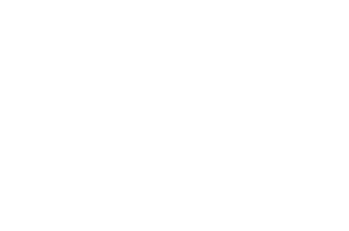

In [26]:
try:
    pos = nx.spring_layout(G, k=1, iterations=20)
    nx.draw_networkx_edges(G, pos)

    nx.draw(
        G,
        pos,
        node_size=final_node_size,
        node_color="Blue",
        edge_color=edge_colors,
        edge_cmap=plt.cm.Reds,
        with_labels=True,
    )
    pylab.show()

except:
    print("Could not show graph")